# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d13/570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Porto Feliz, Sao Paulo, Brazil**, and the stations the data comes from are shown on the map below.

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(13,'570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2')

## Data manipulation

In [6]:
#Reading the file
data = pd.read_csv('temperatures.csv')
data.head(10)

,ID,Date,Element,Data_Value
0,AR000087270,2012-03-27,TMIN,99
1,BRM00083566,2007-07-23,TMIN,118
2,UY000001915,2014-02-06,TMAX,350
3,ARM00087121,2009-05-17,TMIN,81
4,BLM00085315,2009-04-22,TMAX,240
5,PAM00086218,2007-01-10,TMIN,262
6,BR000956000,2011-12-31,TMAX,324
7,PAM00086234,2012-07-06,TMAX,200
8,PAM00086185,2005-08-22,TMAX,372
9,ARM00087148,2008-10-31,TMAX,262


In [7]:
#Drop rows of 29th February (182 rows)
data_1 = data.loc[data['Date'].str.contains('-02-29') == False]
data_1.head(10)

,ID,Date,Element,Data_Value
0,AR000087270,2012-03-27,TMIN,99
1,BRM00083566,2007-07-23,TMIN,118
2,UY000001915,2014-02-06,TMAX,350
3,ARM00087121,2009-05-17,TMIN,81
4,BLM00085315,2009-04-22,TMAX,240
5,PAM00086218,2007-01-10,TMIN,262
6,BR000956000,2011-12-31,TMAX,324
7,PAM00086234,2012-07-06,TMAX,200
8,PAM00086185,2005-08-22,TMAX,372
9,ARM00087148,2008-10-31,TMAX,262


In [120]:
#Transform Date Column into date values
data_1['Date'] = pd.to_datetime(data_1['Date'])

data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363483 entries, 0 to 363664
Data columns (total 4 columns):
ID            363483 non-null object
Date          363483 non-null datetime64[ns]
Element       363483 non-null object
Data_Value    363483 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.9+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [127]:
#Drop ID column
data_1 = data_1.drop('ID', axis = 1)

In [128]:
#Order Date Column
data_1.sort(['Date'], ascending=True, inplace=True)
data_1.head(60)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Date,Element,Data_Value,Temperature C
7836,2005-01-01,TMIN,180,18.0
5784,2005-01-01,TMIN,233,23.3
41813,2005-01-01,TMIN,190,19.0
264022,2005-01-01,TMIN,205,20.5
230208,2005-01-01,TMAX,252,25.2
264025,2005-01-01,TMAX,370,37.0
58393,2005-01-01,TMIN,200,20.0
34052,2005-01-01,TMIN,240,24.0
116922,2005-01-01,TMIN,204,20.4
84259,2005-01-01,TMIN,240,24.0


In [122]:
#Transform Data_Value into degrees C - (/10)
data_1['Temperature C'] = data_1['Data_Value']/10

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [132]:
#Create a time series with dates to specify the Days, Months and Years
date_index = pd.DatetimeIndex(data_1['Date'])
print(type(date_index))
date_index

<class 'pandas.tseries.index.DatetimeIndex'>


DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01',
               ...
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31', '2015-12-31', '2015-12-31',
               '2015-12-31', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=363483, freq=None)

In [133]:
#Indicating 'Date' column as index
data_2 = data_1.set_index(['Date'])
data_2.head(10)

,Element,Data_Value,Temperature C
Date,,,
2005-01-01,TMIN,180,18.0
2005-01-01,TMIN,233,23.3
2005-01-01,TMIN,190,19.0
2005-01-01,TMIN,205,20.5
2005-01-01,TMAX,252,25.2
2005-01-01,TMAX,370,37.0
2005-01-01,TMIN,200,20.0
2005-01-01,TMIN,240,24.0
2005-01-01,TMIN,204,20.4


In [137]:
#Create new columns - Day, Month and Year
data_2['Year'] = date_index.year
data_2['Month'] = date_index.month
data_2['Day'] = date_index.day

data_2.head()

,Element,Data_Value,Temperature C,Month,Day,Year
Date,,,,,,
2005-01-01,TMIN,180,18.0,1,1,2005
2005-01-01,TMIN,233,23.3,1,1,2005
2005-01-01,TMIN,190,19.0,1,1,2005
2005-01-01,TMIN,205,20.5,1,1,2005
2005-01-01,TMAX,252,25.2,1,1,2005


In [156]:
#Drop 'Data_Value' Column, because the temperatures are now in 'Temperatue C' column
data_3 = data_2.drop(['Data_Value'], axis = 1)
data_3.head()
# data_3.info()

,Element,Temperature C,Month,Day,Year
Date,,,,,
2005-01-01,TMIN,18.0,1,1,2005
2005-01-01,TMIN,23.3,1,1,2005
2005-01-01,TMIN,19.0,1,1,2005
2005-01-01,TMIN,20.5,1,1,2005
2005-01-01,TMAX,25.2,1,1,2005


In [157]:
#Separate Values before 2015 (2004 - 2014) and values of 2015

data_2015 = data_3.loc[data_3['Year'] == 2015]
data_2015.tail()

data_2004_2014 = data_3.loc[data_3['Year'] < 2015]
data_2004_2014.tail()

,Element,Temperature C,Month,Day,Year
Date,,,,,
2014-12-31,TMIN,21.8,12,31,2014
2014-12-31,TMIN,16.6,12,31,2014
2014-12-31,TMIN,20.8,12,31,2014
2014-12-31,TMIN,22.6,12,31,2014
2014-12-31,TMAX,37.0,12,31,2014


#### TO DO: find MAX and MIN of each day
TRY: create 2 separate df: MIN each day and MAX each day; 2 for 2015 and 2 for 2004-2015

In [161]:
# 2015 T_MIN - Series type
data_2015_min = data_2015[data_2015['Element'] == 'TMIN'].groupby(['Month', 'Day'])['Temperature C'].min()
data_2015_min.head()
# type(data_2015_min)

Month  Day
1      1       9.8
       2       8.7
       3       6.4
       4      10.2
       5       8.1
Name: Temperature C, dtype: float64

In [162]:
# 2015 T_MAX - Series type
data_2015_max = data_2015[data_2015['Element'] == 'TMAX'].groupby(['Month', 'Day'])['Temperature C'].max()
data_2015_max.head()
# type(data_2015_max)

Month  Day
1      1      40.4
       2      39.8
       3      35.6
       4      33.0
       5      38.4
Name: Temperature C, dtype: float64

In [164]:
# 2004-2014 T_MIN - Series type
data_2004_2014_min = data_2004_2014[data_2004_2014['Element'] == 'TMIN'].groupby(['Month', 'Day'])['Temperature C'].min()
data_2004_2014_min.head()
# type(data_2004_2014_min)

Month  Day
1      1      5.0
       2      6.8
       3      5.6
       4      6.6
       5      5.5
Name: Temperature C, dtype: float64

In [163]:
# 2004-2014 T_MAX - Series type
data_2004_2014_max = data_2004_2014[data_2004_2014['Element'] == 'TMAX'].groupby(['Month', 'Day'])['Temperature C'].max()
data_2004_2014_max.head()
# type(data_2004_2014_max)

Month  Day
1      1      43.5
       2      42.1
       3      41.8
       4      41.5
       5      43.2
Name: Temperature C, dtype: float64

In [203]:
#Discover when records were broken in 2015
record_2015_max = (data_2015_max > data_2004_2014_max).as_matrix()
record_2015_min = (data_2015_min < data_2004_2014_min).as_matrix()

#Discover how many times the max and min records were broken
print(np.sum(record_2015_max), np.sum(record_2015_min))

21 26


## Creating the Line Graph

In [165]:
# Set parameters to all plots
%matplotlib notebook
plt.rc('figure', figsize = (10,4))
plt.rc('font', size = 8)
plt.rc('axes.spines', top = False, right = False)

In [189]:
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))
type(observation_axis)

numpy.ndarray

<IPython.core.display.Javascript object>


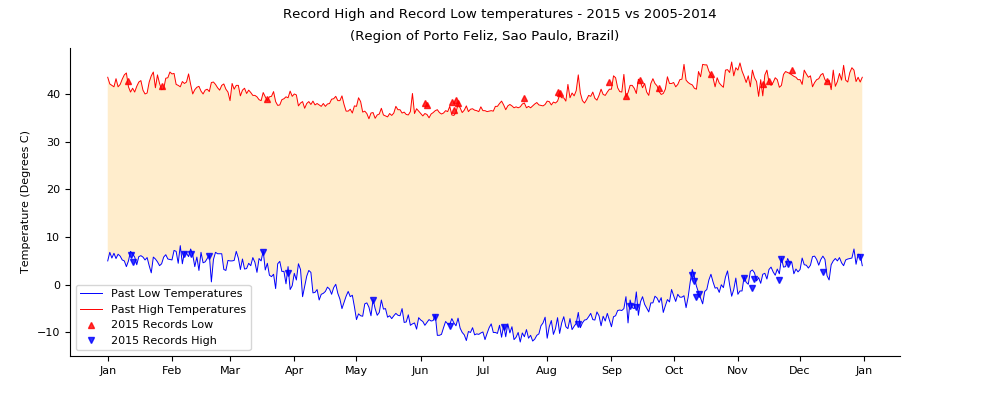

In [222]:
plt.figure()

#Record Temperatures 2004-2014
plt.plot(observation_axis, data_2004_2014_min, '-', color = 'b', lw = 0.7)
plt.plot(observation_axis, data_2004_2014_max, '-', color = 'r', lw = 0.7)

#Record temperatures 2015
plt.plot(observation_axis[record_2015_max], data_2015_max[record_2015_max], 'r^',
         observation_axis[record_2015_min], data_2015_min[record_2015_min], 'bv',
        ms = 5, alpha = 0.8)

In [223]:
#Adjust the plot - to centralize
plt.subplots_adjust(left=0.07)

In [224]:
#Indicate labels and title
plt.ylabel('Temperature (Degrees C)')
plt.xlabel('')
plt.title('(Region of Porto Feliz, Sao Paulo, Brazil)')
plt.suptitle ('Record High and Record Low temperatures - 2015 vs 2005-2014')

#Inidicate Legends
plt.legend(['Past Low Temperatures', 'Past High Temperatures', '2015 Records Low', '2015 Records High'])

In [225]:
#Indicate the x_axis as months
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [226]:
#Fill spabe between lines MAX and MIN
plt.fill_between(observation_axis, data_2004_2014_min, data_2004_2014_max,
                 facecolor = 'orange', alpha = .2)